# OBJECTIVE
* Understand the working of Decision Tree
* Appreciate the advantages and disadvantages of Decision Trees
* Learn to use Grid Search for automatic hyperparameter tuning

In [1]:
import numpy as np
import pylab as pl
import random
import matplotlib 
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import tree 
from sklearn.metrics import accuracy_score
#%matplotlib inline

# About 
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree Classifier</a>

# Decision Tree

<img src='./images/dt1.jpg'>

# Concept of Impurity, Entropy and Information Gain

<img src='./images/dt2.jpg'>
$Entropy=\sum\limits_{i}-p_{i}log_{2}p_{i}$

$p_{i}$ is the probability of class $i$

Information Gain = $Entropy_{parent}$-Average $Entropy_{children}$

# Using Information Gain to construct Decision Tree
* We want to determine which attribute in a given set of training feature vectors is most useful for discriminating between the classes to be learned.
* Information gain tells us how important a given attribute of the feature vectors is.
* We will use it to decide the ordering of attributes in the nodes of a decision tree.

<img src='./images/dt3.jpg'>
Splitting on $X$ gives $IG=1-Entropy_{child 1}+Entropy_{child 2}=((1/3)log_{2}(1/3)-(2/3)log_{2}(2/3))+(0)=0.3112$

Splitting on $Y$ gives $IG=1-(1/2)(0)-(1/2)(0)=1.0$

Splitting on $Z$ gives $IG=1-(1/2)(1)-(1/2)(1)=0.0$

So split on attribute Y

In [2]:
def prettyPicture(clf, X_test, y_test):
    #x_min = 0.0; x_max = 1.0
    #y_min = 0.0; y_max = 1.0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z)#, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "r", label="Defective")
    plt.scatter(grade_bkg, bumpy_bkg, color = "b", label="Perfect")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show(block=False)

In [3]:
data = np.loadtxt('./data/microchip.csv', delimiter=",")
X = data[:,:2]
Y = data[:,2]

# Explore the other hyperparameters

DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

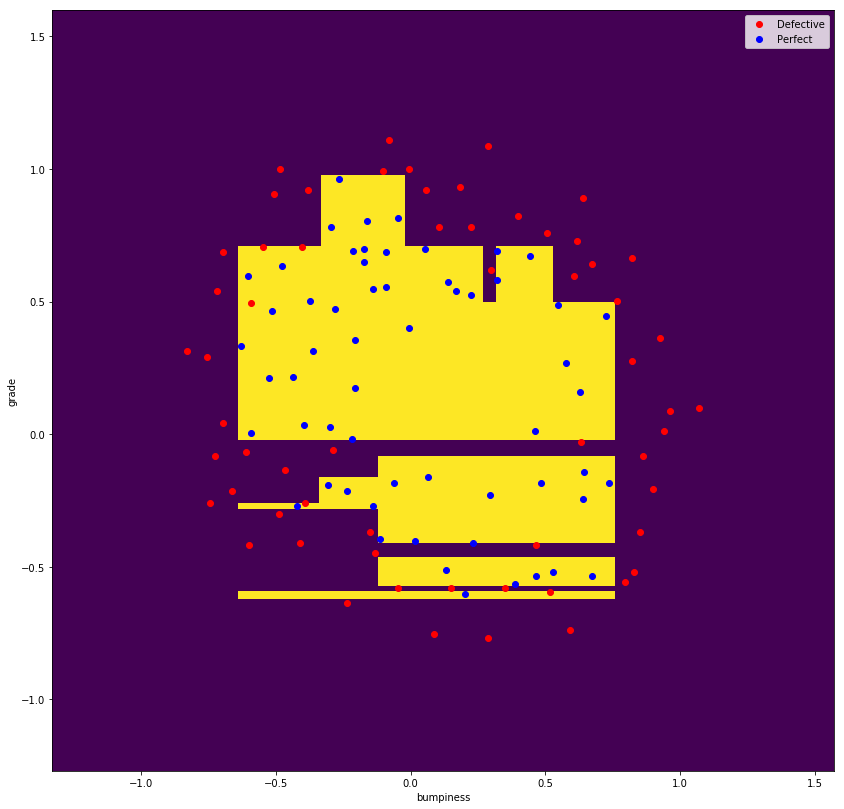

1.0

In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
clf.fit(X,Y)
prettyPicture(clf, X, Y);
y_predict=clf.predict(X)
accuracy_score(Y,y_predict)

# Visualizing the Decision Tree

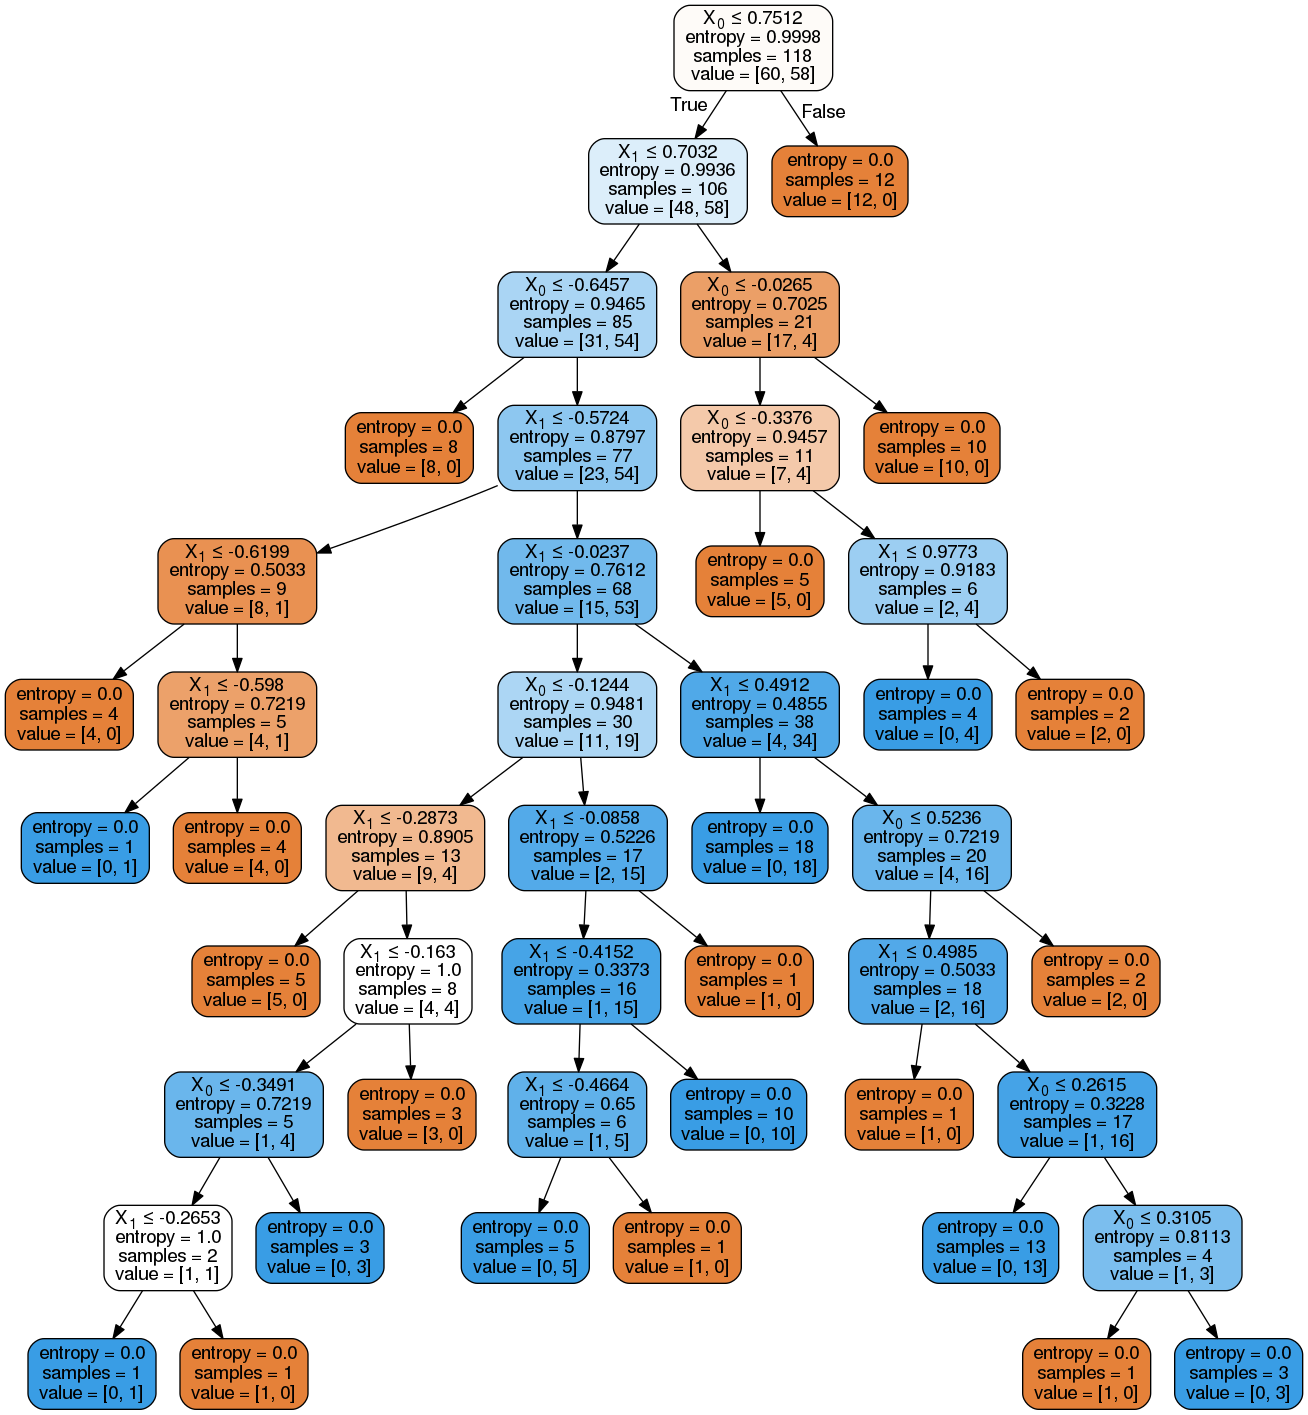

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Grid Search
Hyperparameter tuning is a tough job. How about automating the whole process ?

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, zero_one_loss
from sklearn import grid_search
param_grid = {'max_depth': np.arange(3, 40),'min_samples_split':np.arange(3, 40), 'min_samples_leaf':np.arange(1, 10)}

tree = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid,scoring='accuracy')
tree.fit(X, Y)

grid_search = tree.fit(X, Y)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best parameters ",best_parameters)
print("Best accuracy ",best_accuracy)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best parameters  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best accuracy  0.7627118644067796


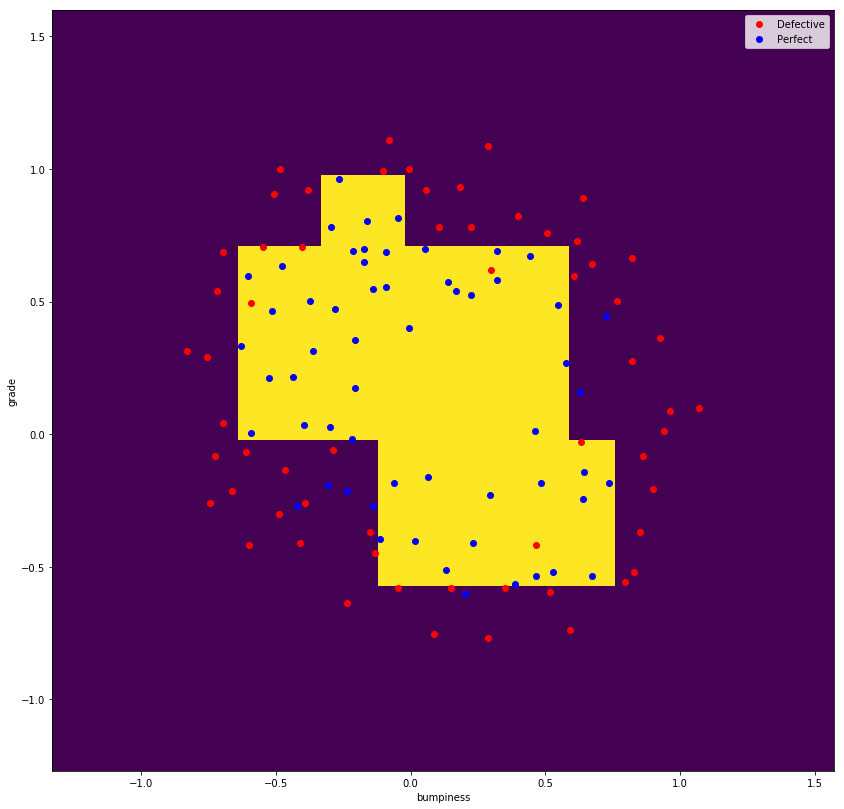

In [7]:
prettyPicture(tree, X, Y);